# Student Performance Indicator
## A Machine Learning Project Lifecycle
- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

1 Understanding the Problem Statement
The aim of this project is to analyze and understand how various factors influence student performance, specifically focusing on test scores. The factors under consideration include Gender, Ethnicity, Parental Level of Education, Lunch, and Test Preparation Course.

2 Data Collection
- **Dataset Source**: The dataset is sourced from [Kaggle - Students Performance in Exams](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977).
- **Dataset Structure**: It comprises 8 columns and 1000 rows, encompassing diverse attributes relevant to student performance.



2.1 Import Data and Required Packages

In [1]:
#import libreries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read csv data into pandas dataframe
df = pd.read_csv('data/StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## 2.2 Dataset Information

The dataset comprises various attributes related to student demographics, background, and academic scores. Each attribute is described below:

- **Gender**: Indicates the student's gender.
  - Possible Values: `Male`, `Female`

- **Race/Ethnicity**: Represents the student's ethnicity.
  - Categories: `Group A`, `Group B`, `Group C`, `Group D`, `Group E`

- **Parental Level of Education**: Refers to the highest level of education attained by the student's parents.
  - Education Levels: `Bachelor's Degree`, `Some College`, `Master's Degree`, `Associate's Degree`, `High School`

- **Lunch**: Describes the type of lunch consumed by the student before the test.
  - Types: `Standard`, `Free/Reduced`

- **Test Preparation Course**: Indicates whether the student completed a test preparation course.
  - Status: `Completed`, `Not Completed`

- **Math Score**: The score achieved by the student in the mathematics test.

- **Reading Score**: The score achieved by the student in the reading test.

- **Writing Score**: The score achieved by the student in the writing test.


## 3. Data Checks to Perform

Before proceeding with data analysis and modeling, the following data checks are crucial to ensure data quality and integrity:

1. **Check for Missing Values**
   - Identify any missing or null values in the dataset.
   - Determine the need for handling these missing values, either through imputation or removal.

2. **Check for Duplicates**
   - Search for any duplicate entries or rows in the dataset.
   - Decide on deduplication strategies if necessary.

3. **Check Data Types**
   - Verify the data types (e.g., integer, float, string) of each column.
   - Ensure that each column's data type is appropriate for the data it contains.

4. **Check the Number of Unique Values in Each Column**
   - Assess the count of unique values in each column, especially for categorical data.
   - This helps in understanding the diversity and distribution of categories.

5. **Check Statistics of Dataset**
   - Examine basic statistical measures (mean, median, standard deviation, etc.) for numerical columns.
   - This provides insights into the central tendency and spread of the data.

6. **Check Various Categories Present in Categorical Columns**
   - Enumerate the different categories present in each categorical column.
   - Understand the composition and prevalence of these categories in the dataset.


3.1. **Check for Missing Values**

In [4]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values in the data set.

3.2. **Check for Duplicates**

In [5]:
df.duplicated().sum()

0

There are no duplicates values in the data set.

3.3. **Check Data Types**

In [6]:
# Check Null and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


3.4. **Check the Number of Unique Values in Each Column**

In [7]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

3.5. **Check Statistics of Dataset**

In [8]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Insights from Numerical Data Analysis

After analyzing the descriptive statistics of the numerical data, several key insights can be drawn:

1. **Means of Scores**:
   - The mean scores for all subjects (Math, Reading, Writing) are relatively close, lying in the range of 66 to 68.05.
   - This indicates a general consistency in performance across different subjects.

2. **Standard Deviations**:
   - The standard deviations for these subjects are also in a close range, between 14.6 and 15.19.
   - This suggests a similar spread or variability in scores across all subjects.

3. **Minimum Scores**:
   - A notable observation is the minimum score for Math, which is as low as 0.
   - On the other hand, the minimum scores for Writing and Reading are significantly higher, at 10 and 17 respectively.
   - This disparity in minimum scores could indicate different levels of difficulty or student preparedness among these subjects.


3.6. **Check Various Categories Present in Categorical Columns**

In [10]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [13]:
print(f"Categories in 'gender' variable:\n{df['gender'].unique()}\n")

print(f"Categories in 'race_ethnicity' variable:\n{df['race/ethnicity'].unique()}\n")

print(f"Categories in 'parental level of education' variable:\n{df['parental level of education'].unique()}\n")

print(f"Categories in 'lunch' variable:\n{df['lunch'].unique()}\n")

print(f"Categories in 'test preparation course' variable:\n{df['test preparation course'].unique()}\n")


Categories in 'gender' variable:
['female' 'male']

Categories in 'race_ethnicity' variable:
['group B' 'group C' 'group A' 'group D' 'group E']

Categories in 'parental level of education' variable:
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Categories in 'lunch' variable:
['standard' 'free/reduced']

Categories in 'test preparation course' variable:
['none' 'completed']



In [14]:
# Define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# Print columns
print(f'We have {len(numeric_features)} numerical features: {numeric_features}\n')
print(f'We have {len(categorical_features)} categorical features: {categorical_features}')


We have 3 numerical features: ['math score', 'reading score', 'writing score']

We have 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


3.7. **Calculate Values And Store In New Columns**

In [16]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [18]:
reading_full = df[df['reading score'] == 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()
math_full = df[df['math score'] == 100]['average'].count()

print(f'Total students achieving full marks in Math: {math_full}')
print(f'Total students achieving full marks in Writing: {writing_full}')
print(f'Total students achieving full marks in Reading: {reading_full}')


Total students achieving full marks in Math: 7
Total students achieving full marks in Writing: 14
Total students achieving full marks in Reading: 17


In [20]:
reading_less_20 = df[df['reading score'] <= 20]['average'].count()
writing_less_20 = df[df['writing score'] <= 20]['average'].count()
math_less_20 = df[df['math score'] <= 20]['average'].count()

print(f'Students scoring 20 or less in Math: {math_less_20}')
print(f'Students scoring 20 or less in Writing: {writing_less_20}')
print(f'Students scoring 20 or less in Reading: {reading_less_20}')


Students scoring 20 or less in Math: 4
Students scoring 20 or less in Writing: 3
Students scoring 20 or less in Reading: 1


Insights:
- The analysis of student scores reveals that Mathematics is the subject where students have shown the lowest performance, as indicated by the higher number of students scoring 20 or less.
- Conversely, Reading emerges as the subject with the best overall performance, with fewer students falling into the lowest score range.


## Exploring Data ( Visualization )

4.1.  **Visualization of Average Score Distribution**
## 

### Insights and Conclusions
By visualizing the average score distribution, we aim to derive some key conclusions. The methods used for this analysis are:

- **Histogram**: This graph will display the frequency of the average scores, highlighting patterns such as the concentration of scores, skewness, and the overall range of the scores.

- **Kernel Density Estimate (KDE)**: The KDE plot provides a smooth curve representing the data distribution, offering insights into the central tendencies and the shape of the distribution.

### Expected Outcomes
From these visualizations, we anticipate gaining insights into:
- The general performance level of students.
- Identification of common score ranges or any anomalies.
- Understanding the skewness of the score distribution, indicating whether the majority of students are scoring high, low, or if the scores are evenly spread out.

These insights will be crucial in identifying areas for improvement and recognizing the strengths in student performance.

4.1.1 Histogram & KDE

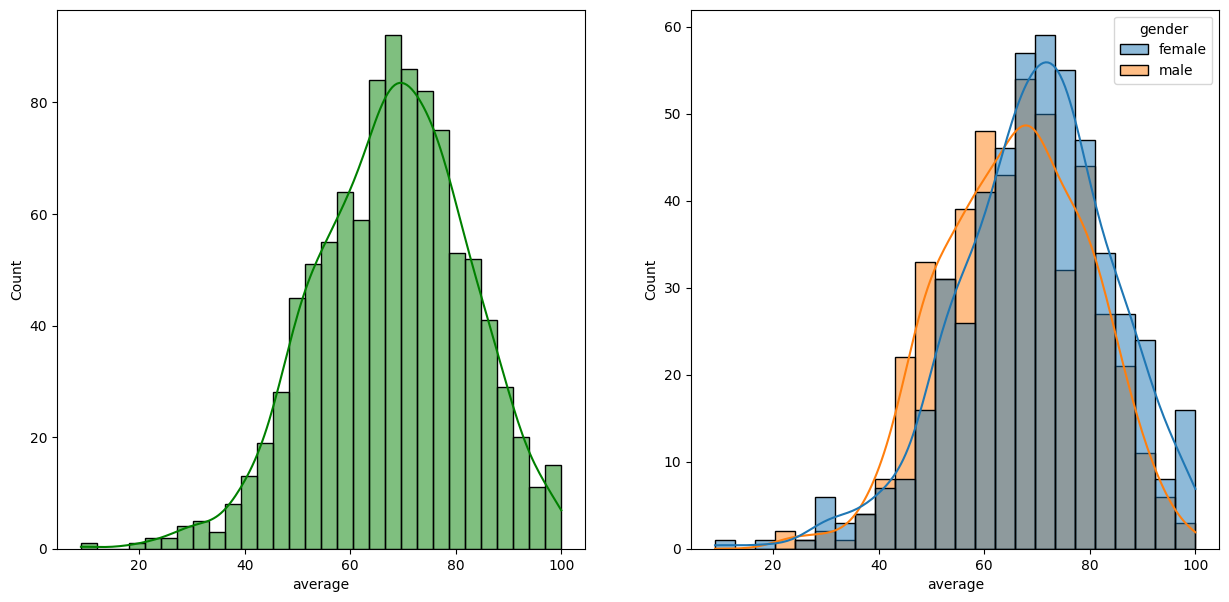

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

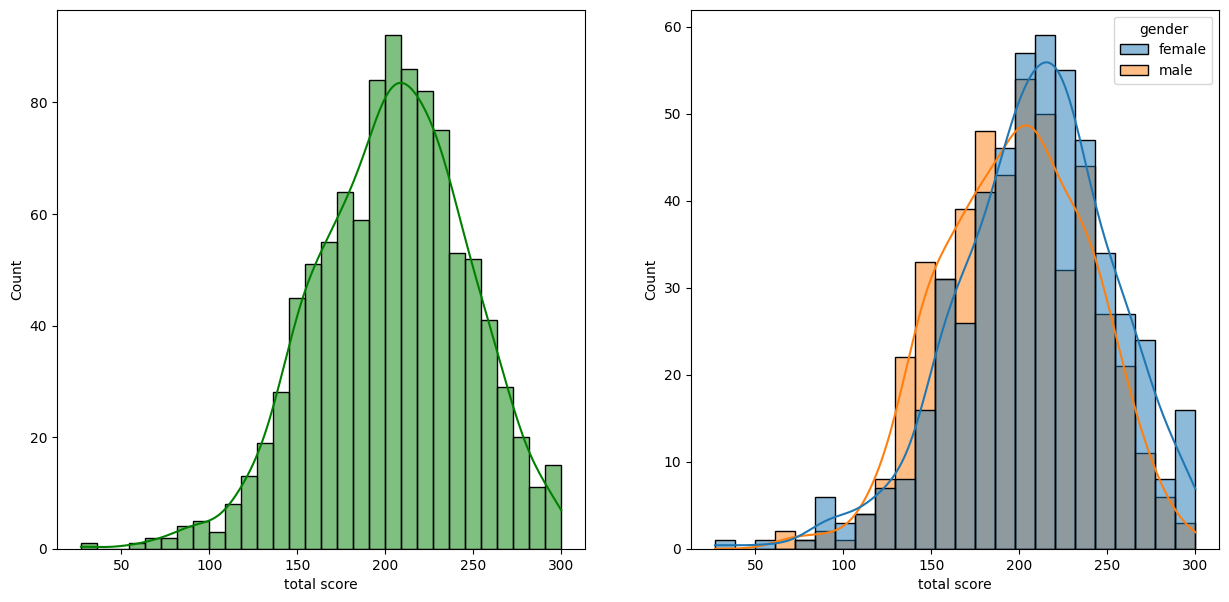

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

Insights

- **Gender-Based Performance Trends**: Analysis indicates that female students tend to outperform male students in their academic achievements. This trend suggests potential differences in learning styles, engagement, or other educational factors between genders.


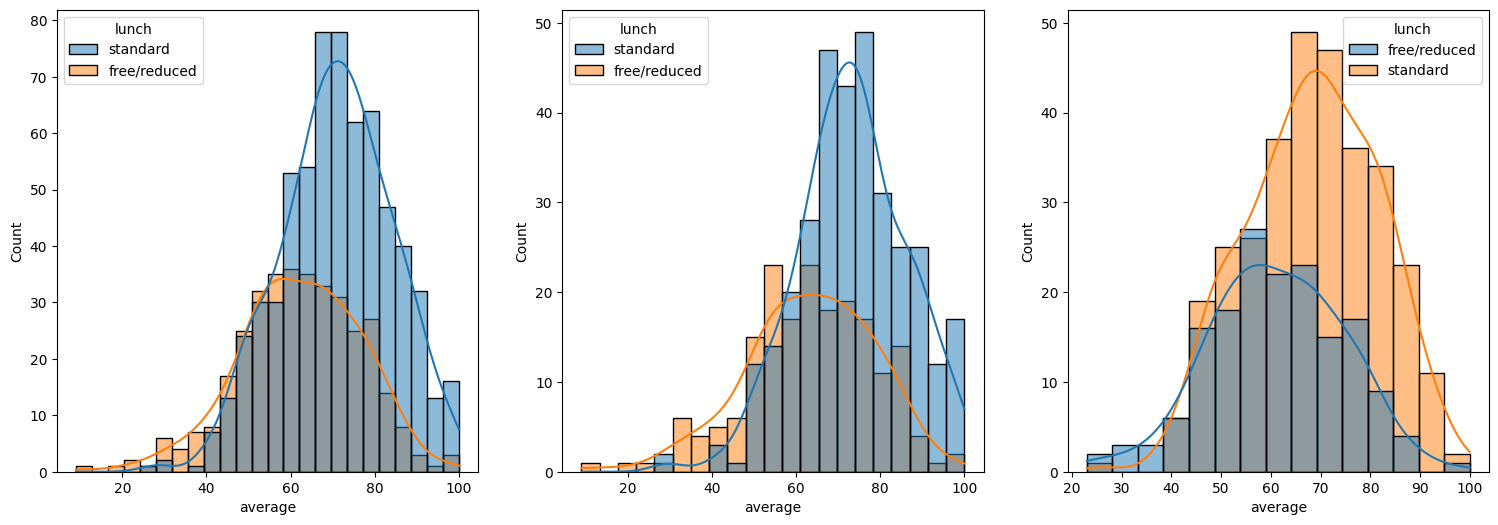

In [23]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

Insights

- **Impact of Standard Lunch on Exam Performance**: It is observed that having a standard lunch positively influences exam performance. This trend is consistent regardless of the student's gender, indicating that access to standard lunch facilities plays a crucial role in academic success.


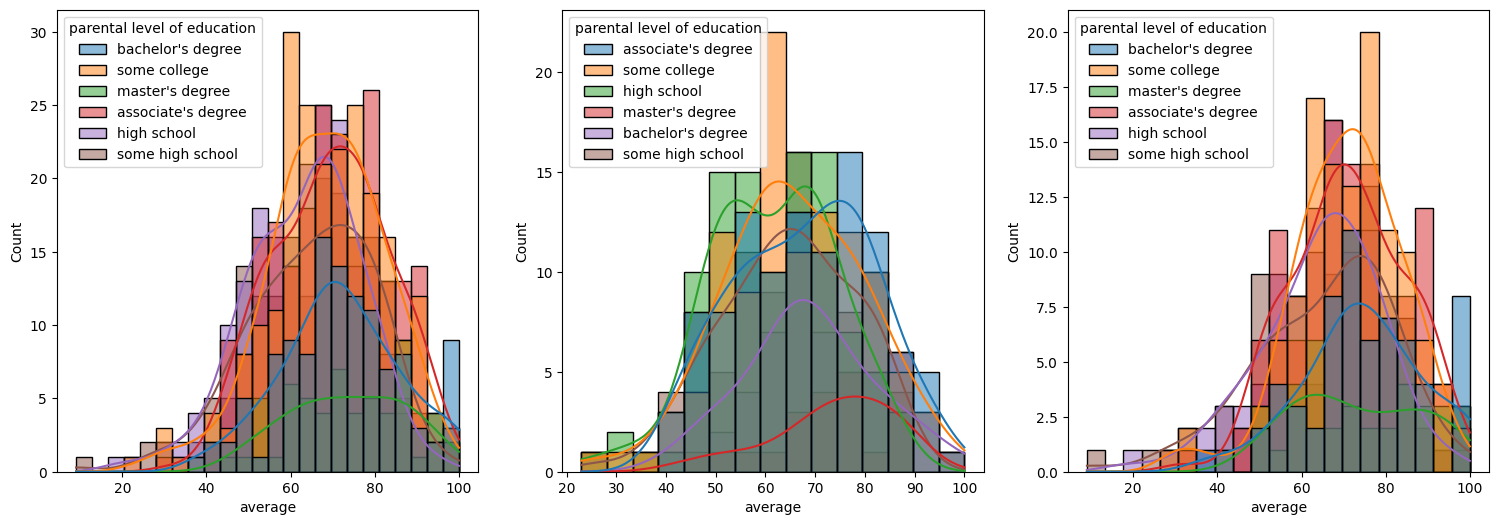

In [24]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental level of education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.show()

Insights

- **General Influence of Parental Education**: Overall, the data suggests that a parent's level of education does not significantly impact a student's performance in exams. This observation indicates that other factors might play a more pivotal role in academic success.

- **Impact of Parental Education on Male Students**: However, a closer analysis reveals a specific trend: male students whose parents have an associate's degree or a master's degree generally perform better in exams. This pattern highlights the potential influence of parental education on male academic achievement in certain educational backgrounds.

- **Parental Education and Female Students**: Contrasting with the trend observed in male students, the data shows no significant effect of parental education on the exam performance of female students. This lack of correlation suggests that factors other than parental education might be more influential in determining academic success for female students.


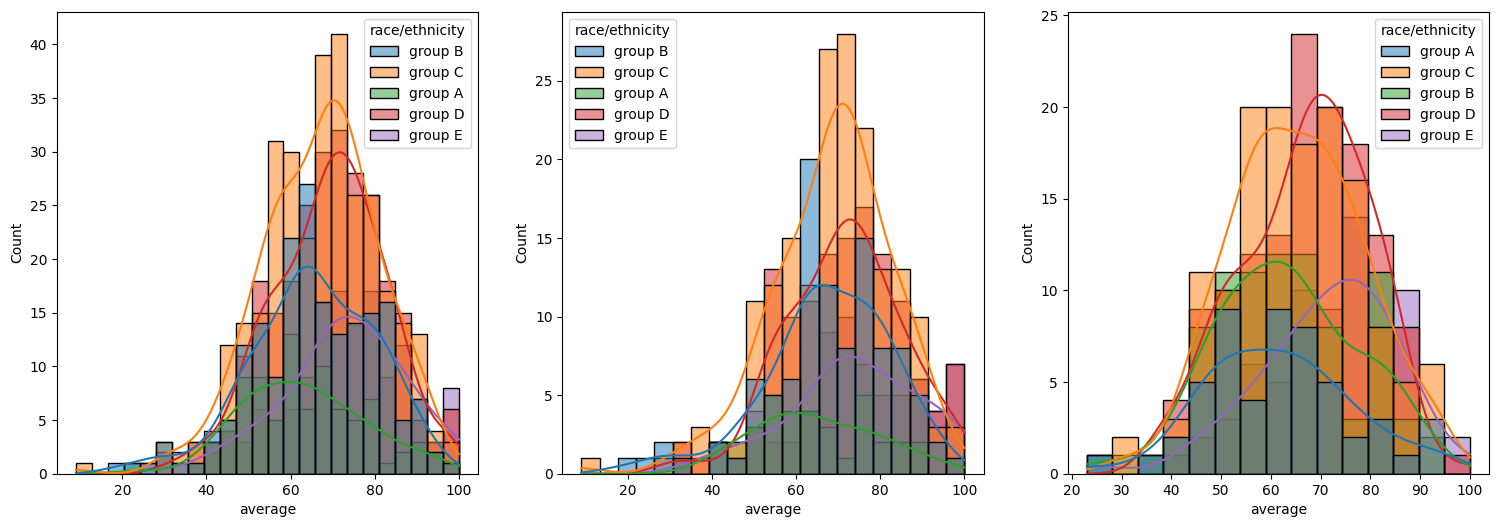

In [25]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')
plt.show()

Insights

- **Performance of Students in Groups A and B**: The analysis indicates that students belonging to groups A and B tend to have lower performance in exams. This trend is consistent and noticeable across these groups.

- **Gender-Independent Trend in Groups A and B**: Further examination reveals that this lower performance is irrespective of gender. Both male and female students in groups A and B exhibit similar patterns of underperformance in exams. This consistency suggests that factors other than gender, perhaps related to


4.2.  **Maximumum score of students in all three subjects**

<Axes: title={'center': 'WRITING SCORES'}, ylabel='writing score'>

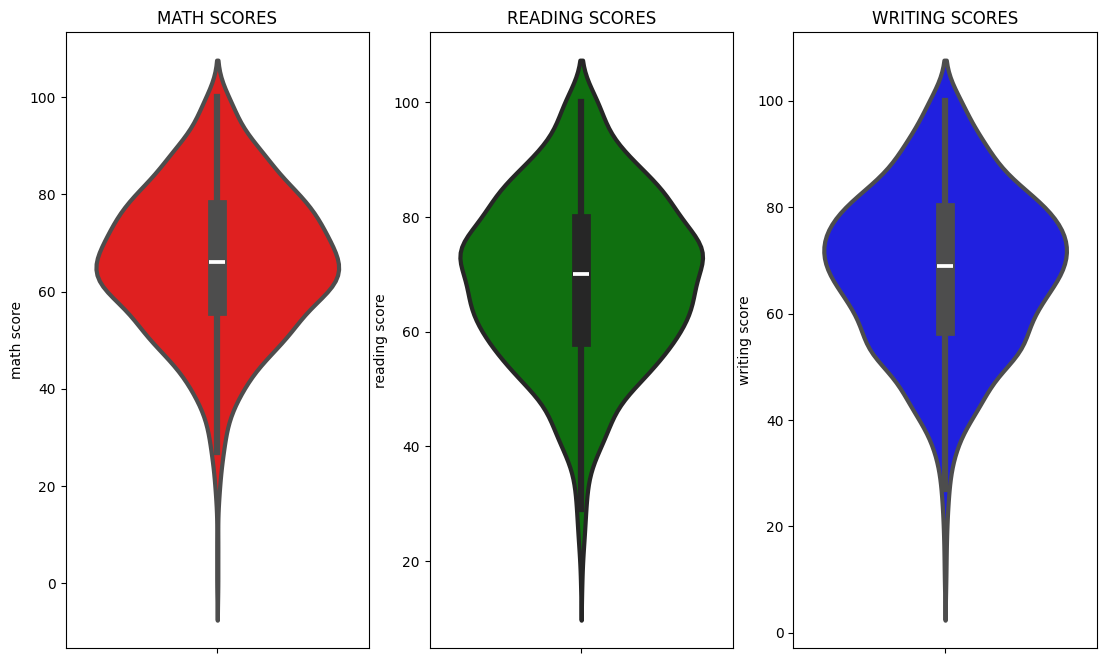

In [26]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)

Insights

- **Math Scores**: The analysis of the Math score distribution reveals a concentration of student scores primarily in the range of 60-80. This pattern indicates a general proficiency in Math among most students.

- **Reading and Writing Scores**: In contrast to Math, the score distributions for Reading and Writing show a broader range of scores. The majority of students score between 50-80 in these subjects. This suggests a wider variation in performance levels in Reading and Writing compared to Math.


4.3.  **Multivariate analysis using pieplot**

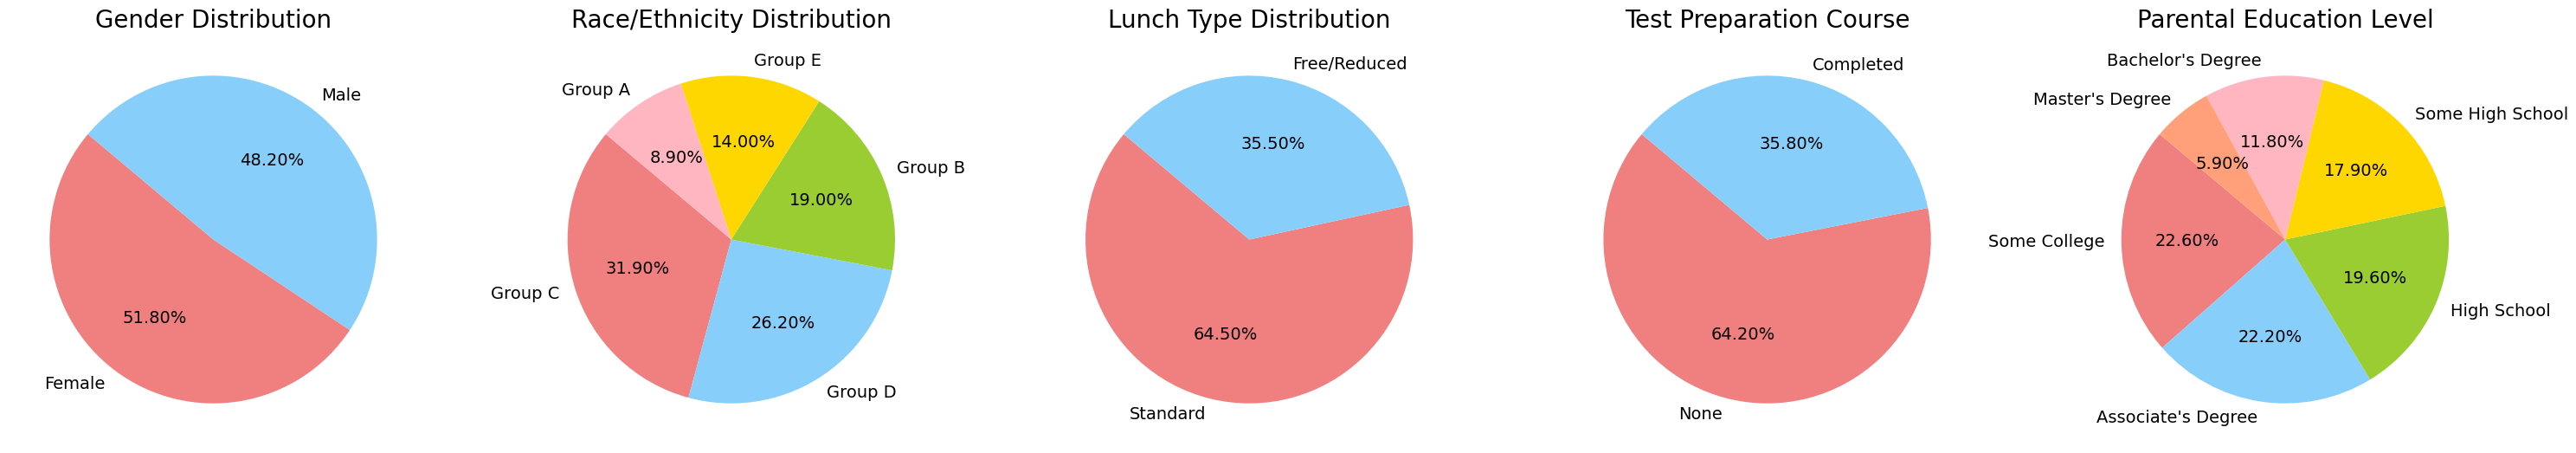

In [29]:
plt.rcParams['figure.figsize'] = (30, 12)


label_fontsize = 14  
autopct_fontsize = 14  
colors = ['lightcoral', 'lightskyblue']  

# Gender Pie Chart
plt.subplot(1, 5, 1)
sizes = df['gender'].value_counts()
labels = ['Female', 'Male']
plt.pie(sizes, colors=colors, labels=labels, autopct=lambda p: '{:.2f}%'.format(p), startangle=140, textprops={'fontsize': autopct_fontsize})
plt.title('Gender Distribution', fontsize=20)

# Race/Ethnicity Pie Chart
plt.subplot(1, 5, 2)
sizes = df['race/ethnicity'].value_counts()
labels = ['Group C', 'Group D', 'Group B', 'Group E', 'Group A']
plt.pie(sizes, colors=colors + ['yellowgreen', 'gold', 'lightpink'], labels=labels, autopct=lambda p: '{:.2f}%'.format(p), startangle=140, textprops={'fontsize': autopct_fontsize})
plt.title('Race/Ethnicity Distribution', fontsize=20)

# Lunch Pie Chart
plt.subplot(1, 5, 3)
sizes = df['lunch'].value_counts()
labels = ['Standard', 'Free/Reduced']
plt.pie(sizes, colors=colors, labels=labels, autopct=lambda p: '{:.2f}%'.format(p), startangle=140, textprops={'fontsize': autopct_fontsize})
plt.title('Lunch Type Distribution', fontsize=20)

# Test Course Pie Chart
plt.subplot(1, 5, 4)
sizes = df['test preparation course'].value_counts()
labels = ['None', 'Completed']
plt.pie(sizes, colors=colors, labels=labels, autopct=lambda p: '{:.2f}%'.format(p), startangle=140, textprops={'fontsize': autopct_fontsize})
plt.title('Test Preparation Course', fontsize=20)

# Parental Education Pie Chart
plt.subplot(1, 5, 5)
sizes = df['parental level of education'].value_counts()
labels = ["Some College", "Associate's Degree", "High School", "Some High School", "Bachelor's Degree", "Master's Degree"]
plt.pie(sizes, colors=colors + ['yellowgreen', 'gold', 'lightpink', 'lightsalmon'], labels=labels, autopct=lambda p: '{:.2f}%'.format(p), startangle=140, textprops={'fontsize': autopct_fontsize})
plt.title('Parental Education Level', fontsize=20)

plt.tight_layout()
plt.show()


Insights 

- **Gender Distribution**: The data shows a nearly equal distribution between male and female students, indicating a balanced gender representation in the student population.

- **Group Representation**: Among various groups, Group C has the highest number of students, making it the most represented group in the dataset.

- **Lunch Provision**: A significant majority of students have access to standard lunch, pointing towards a prevalent provision of standard lunch options in the student community.

- **Test Preparation Course Enrollment**: The number of students who have not enrolled in any test preparation course is notably higher, suggesting a general trend of non-participation in these courses.

- **Parental Education Levels**: When it comes to parental education, 'Some College' is the most common level, closely followed by an 'Associate's Degree'. This indicates a higher prevalence of some college education among the parents of the students.


4.4.  **Feature Wise Visualization**

4.4.1 Analysis of Gender Distribution

### Gender Distribution

- **Question**: How is the distribution of gender among students?
- **Objective**: To understand the proportional representation of different genders within the student population.

### Impact of Gender on Student Performance

- **Question**: Does gender have any impact on a student's performance?
- **Objective**: To investigate if there is a correlation between a student’s gender and their academic performance. This includes analyzing performance in various subjects and overall academic achievements.


UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

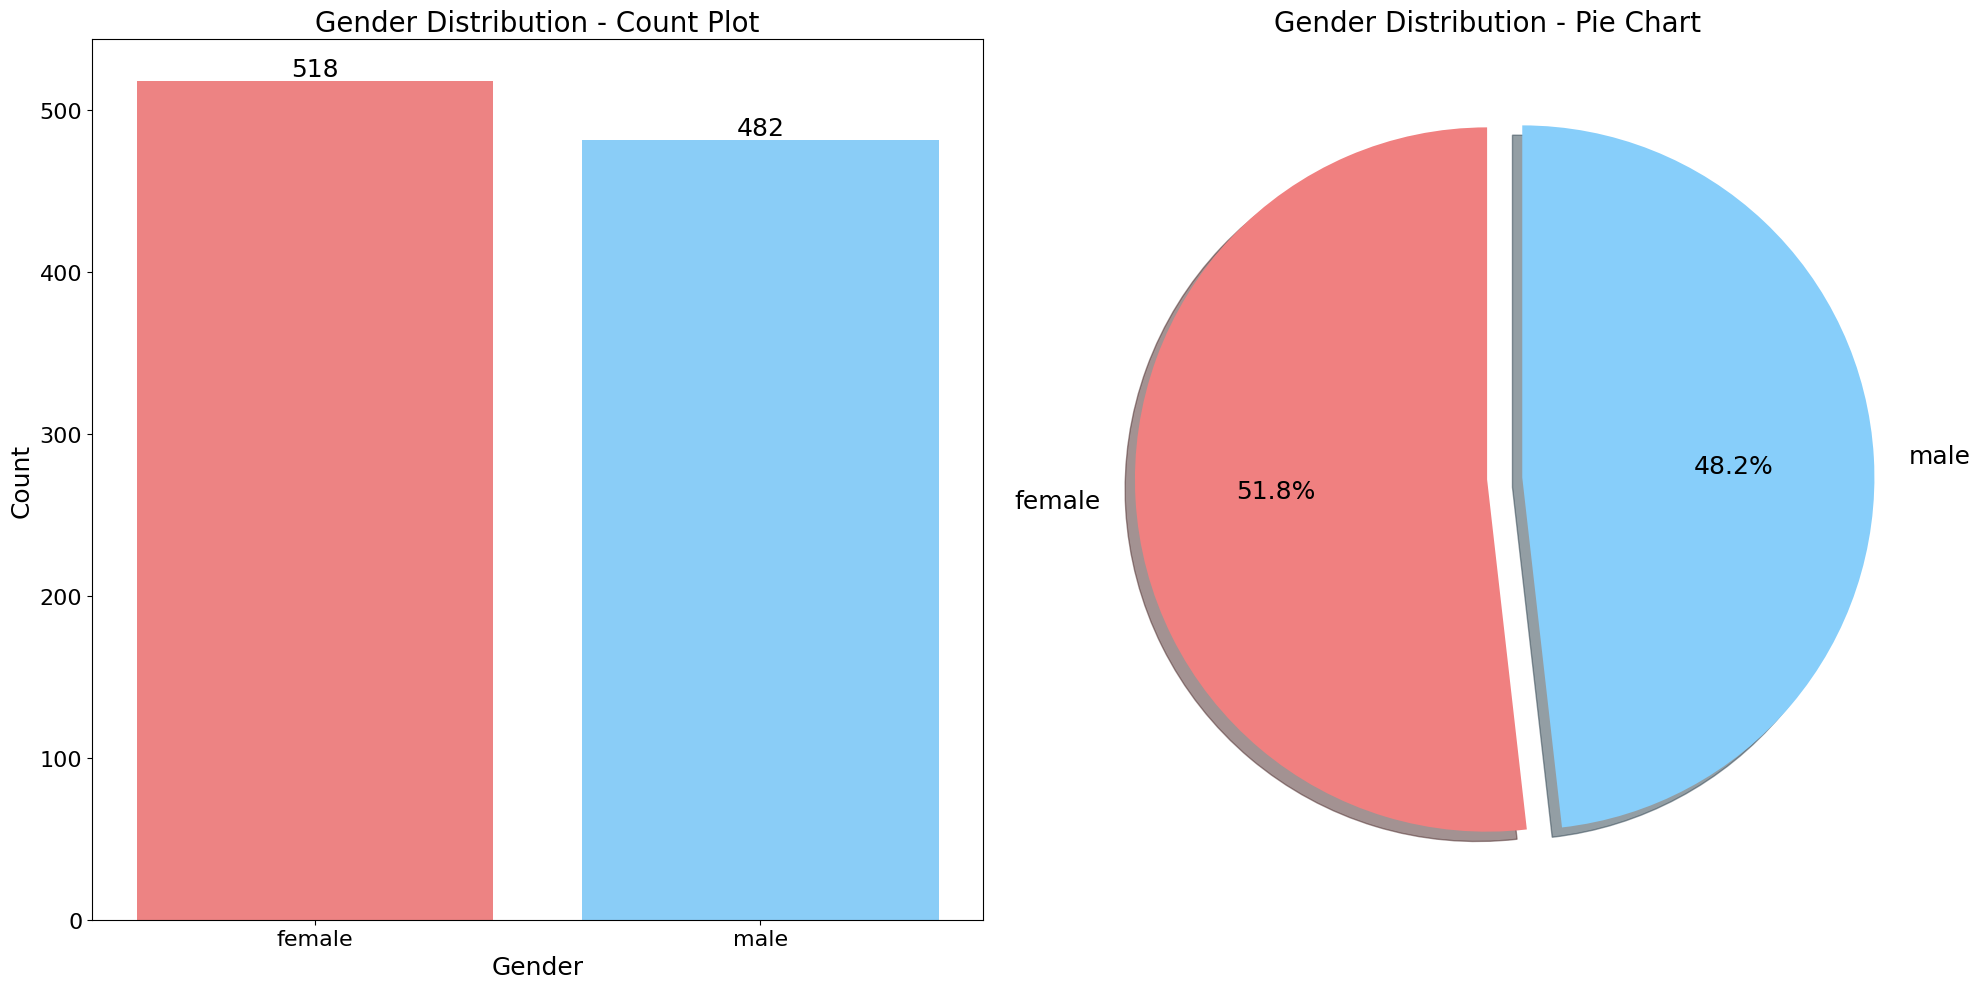

In [38]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Define colors for consistency
colors = ['lightcoral', 'lightskyblue']  # Coral for Male, Sky Blue for Female

# Count Plot
sns.countplot(x='gender', data=df, palette=colors, ax=ax[0], saturation=0.95)
ax[0].set_title('Gender Distribution - Count Plot', fontsize=20)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=18)
ax[0].set_xticklabels(ax[0].get_xticklabels(), fontsize=16) 
ax[0].set_yticklabels(ax[0].get_yticklabels(), fontsize=16)  
ax[0].set_xlabel('Gender', fontsize=18)  # Adjust x-axis label size
ax[0].set_ylabel('Count', fontsize=18)
# Pie Chart
sizes = df['gender'].value_counts()
ax[1].pie(sizes, labels=sizes.index, explode=[0, 0.1], autopct=lambda p: f'{p:.1f}%', shadow=True, colors=colors, startangle=90, textprops={'fontsize': 18})
ax[1].set_title('Gender Distribution - Pie Chart', fontsize=20)

# Adjust layout for better spacing and display
plt.tight_layout()
plt.show()

Insights on Gender Distribution

- **Balanced Gender Representation**: The dataset exhibits a balanced distribution between genders. Female students constitute 518 of the total, representing 48%, while male students account for 482, making up 52% of the student population.


BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

In [43]:
numeric_columns = df.select_dtypes(include=['number'])
gender_group = numeric_columns.groupby(df['gender']).mean()

print(gender_group)

        math score  reading score  writing score  total score    average
gender                                                                  
female   63.633205      72.608108      72.467181   208.708494  69.569498
male     68.728216      65.473029      63.311203   197.512448  65.837483


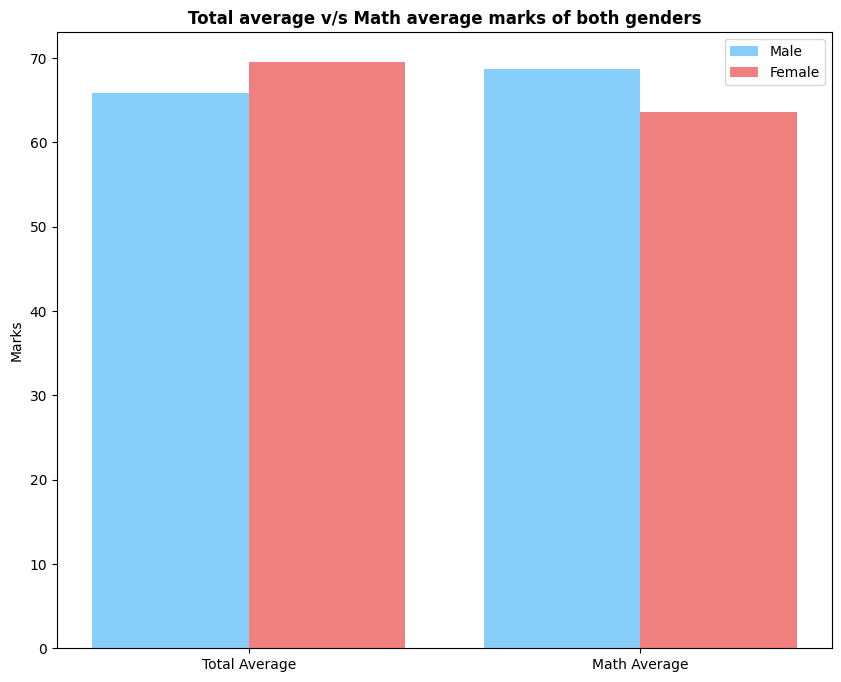

In [46]:
plt.figure(figsize=(10, 8))

X = ['Total Average', 'Math Average']

female_scores = [gender_group['average'][0], gender_group['math score'][0]]
male_scores = [gender_group['average'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))

colors = [ 'lightskyblue','lightcoral']  # Specify the colors here

plt.bar(X_axis - 0.2, male_scores, 0.4, label='Male', color=colors[0])
plt.bar(X_axis + 0.2, female_scores, 0.4, label='Female', color=colors[1])

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both genders", fontweight='bold')
plt.legend()
plt.show()

Insights on Gender-Based Performance Differences

- **Overall Academic Performance**: On average, female students have demonstrated a higher overall score compared to male students. This suggests that females, in general, tend to achieve better academic outcomes across the board.

- **Subject-Specific Performance in Maths**: Contrasting with the overall trend, male students have exhibited higher scores in Mathematics. This indicates a gender-based disparity in performance favoring males in this specific subject area.


4.4.2 RACE/EHNICITY COLUMN
- How is Group wise distribution ?
- Is Race/Ehnicity has any impact on student's performance ?

UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

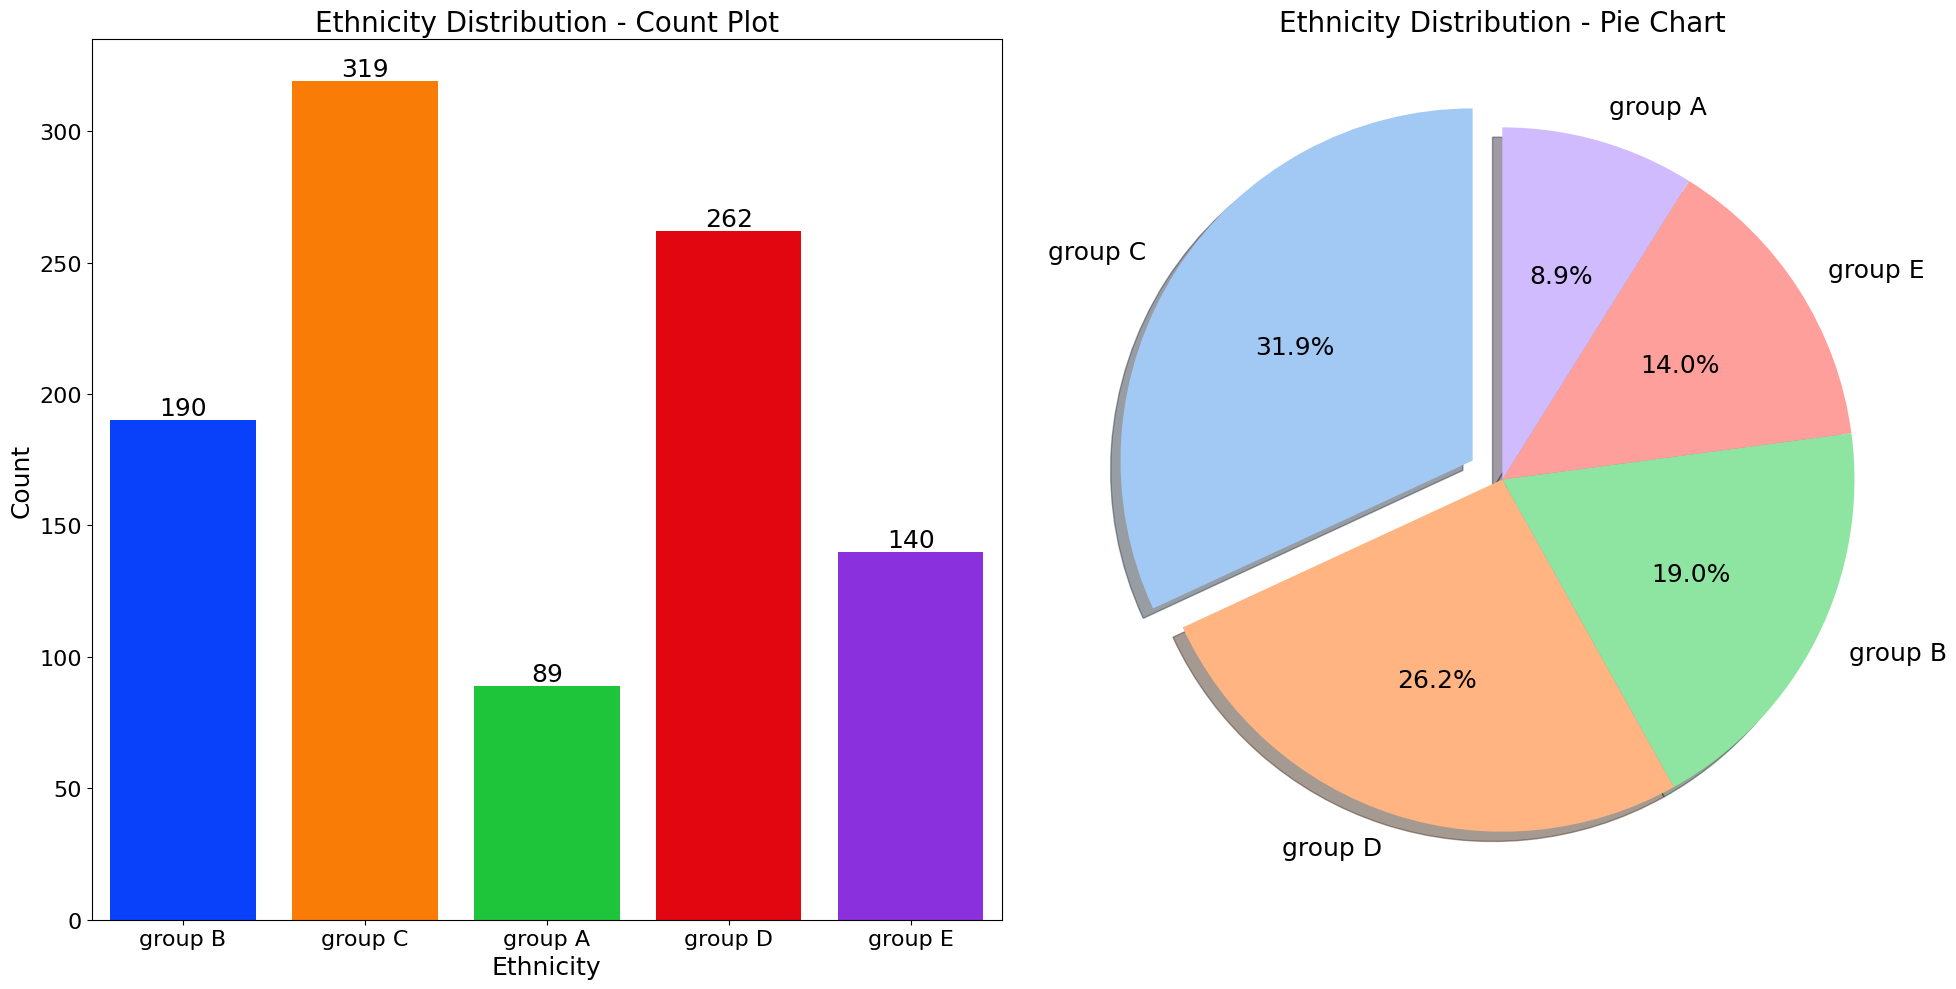

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a palette for the count plot
countplot_colors = sns.color_palette('bright')

# Create a different palette for the pie chart
piechart_colors = sns.color_palette('pastel')

f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Count Plot
sns.countplot(x=df['race/ethnicity'], data=df, palette=countplot_colors, ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=18)

ax[0].set_title('Ethnicity Distribution - Count Plot', fontsize=20)
ax[0].set_xticklabels(ax[0].get_xticklabels(), fontsize=16)
ax[0].set_yticklabels(ax[0].get_yticklabels(), fontsize=16)
ax[0].set_xlabel('Ethnicity', fontsize=18)
ax[0].set_ylabel('Count', fontsize=18)

# Pie Chart
sizes = df['race/ethnicity'].value_counts()
ax[1].pie(sizes, labels=sizes.index, explode=[0.1, 0, 0, 0, 0], autopct=lambda p: f'{p:.1f}%', shadow=True, colors=piechart_colors, startangle=90, textprops={'fontsize': 18})
ax[1].set_title('Ethnicity Distribution - Pie Chart', fontsize=20)

# Adjust layout for better spacing and display
plt.tight_layout()
plt.show()


Insights on Student Group Distribution

- **Predominant Groups**: The majority of students are found to belong to Group C and Group D. These groups represent the largest segments within the student population.

- **Smallest Group Representation**: Conversely, Group A contains the lowest number of students, indicating it is the least represented group in the dataset.


BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

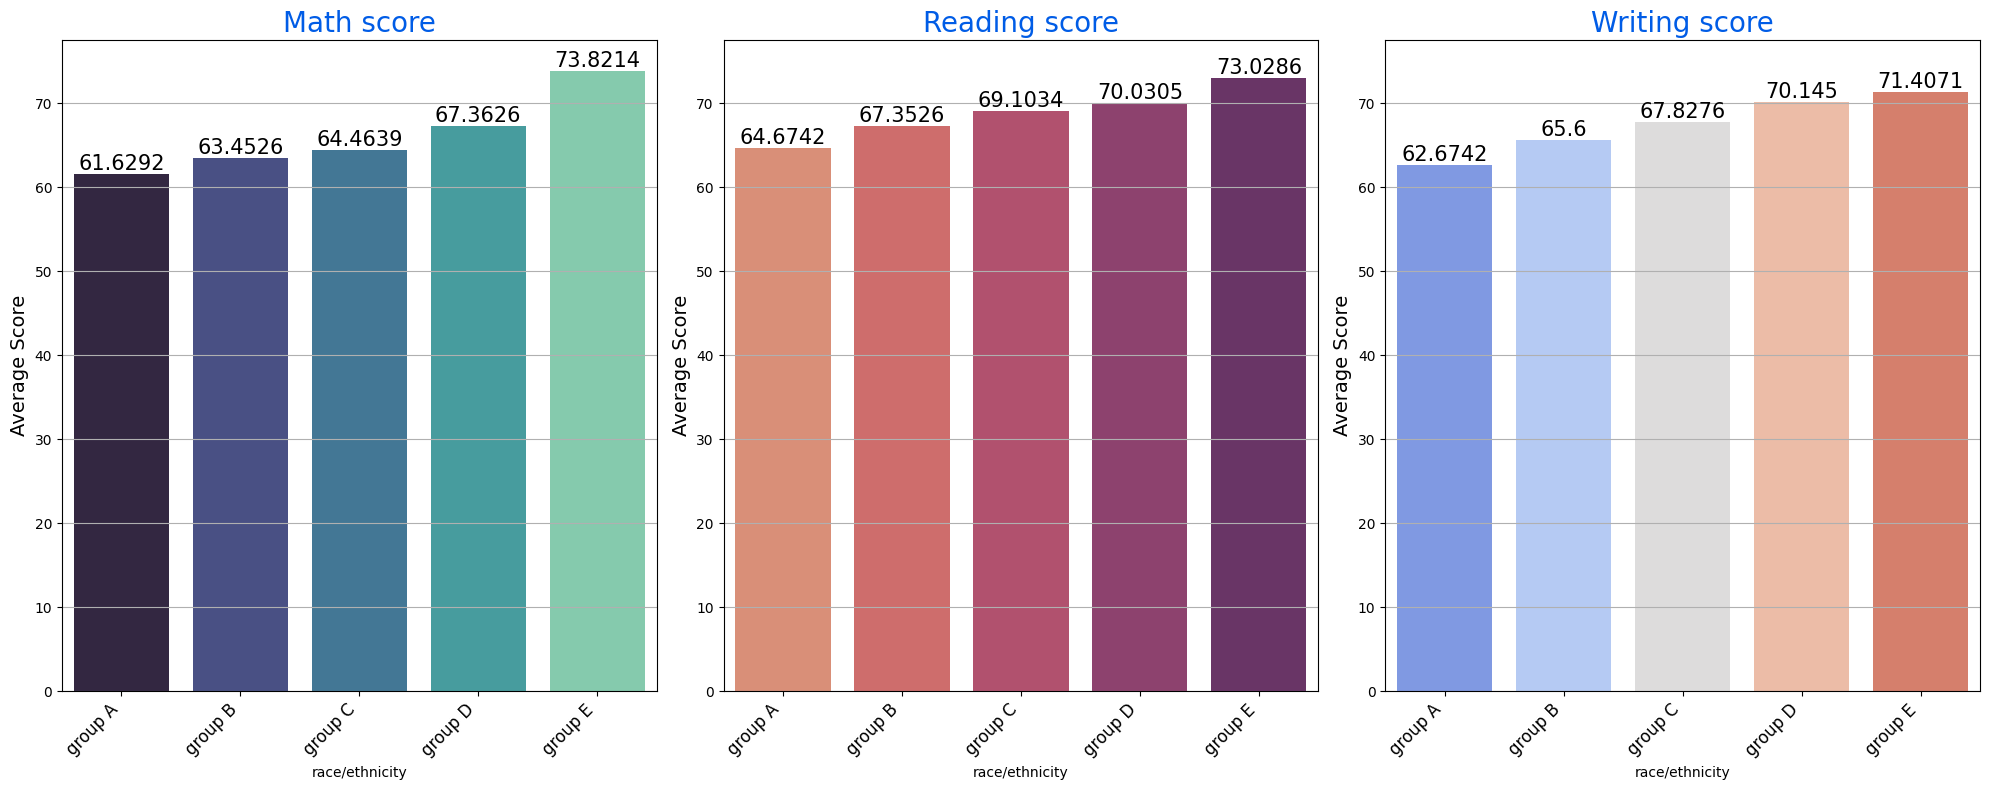

In [52]:
Group_data2=df.groupby('race/ethnicity')
f, ax = plt.subplots(1, 3, figsize=(20, 8))

# Math Score Plot
sns.barplot(x=Group_data2['math score'].mean().index, y=Group_data2['math score'].mean().values, palette='mako', ax=ax[0])
ax[0].set_title('Math score', color='#005ce6', size=20)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right', fontsize=12)
ax[0].set_ylabel('Average Score', fontsize=14)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

# Reading Score Plot
sns.barplot(x=Group_data2['reading score'].mean().index, y=Group_data2['reading score'].mean().values, palette='flare', ax=ax[1])
ax[1].set_title('Reading score', color='#005ce6', size=20)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right', fontsize=12)
ax[1].set_ylabel('Average Score', fontsize=14)
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=15)

# Writing Score Plot
sns.barplot(x=Group_data2['writing score'].mean().index, y=Group_data2['writing score'].mean().values, palette='coolwarm', ax=ax[2])
ax[2].set_title('Writing score', color='#005ce6', size=20)
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=45, ha='right', fontsize=12)
ax[2].set_ylabel('Average Score', fontsize=14)
for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=15)

# Optional: Set a common y-axis range for all plots
y_max = max(ax[0].get_ylim()[1], ax[1].get_ylim()[1], ax[2].get_ylim()[1])
ax[0].set_ylim(0, y_max)
ax[1].set_ylim(0, y_max)
ax[2].set_ylim(0, y_max)

# Adding horizontal gridlines for readability
for axis in ax:
    axis.yaxis.grid(True)

plt.tight_layout()
plt.show()

Insights on Academic Performance by Student Groups

- **Top Performers - Group E**: Students from Group E have consistently scored the highest marks, indicating a strong academic performance within this group.

- **Lower Performance - Group A**: In contrast, students from Group A have the lowest scores. This trend highlights a relative underperformance in this group compared to others.

- **Influence of Socioeconomic Status**: There is a notable trend where students from lower socioeconomic backgrounds tend to have lower average scores across all course subjects. This suggests that socioeconomic factors play a significant role in academic achievement.


4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

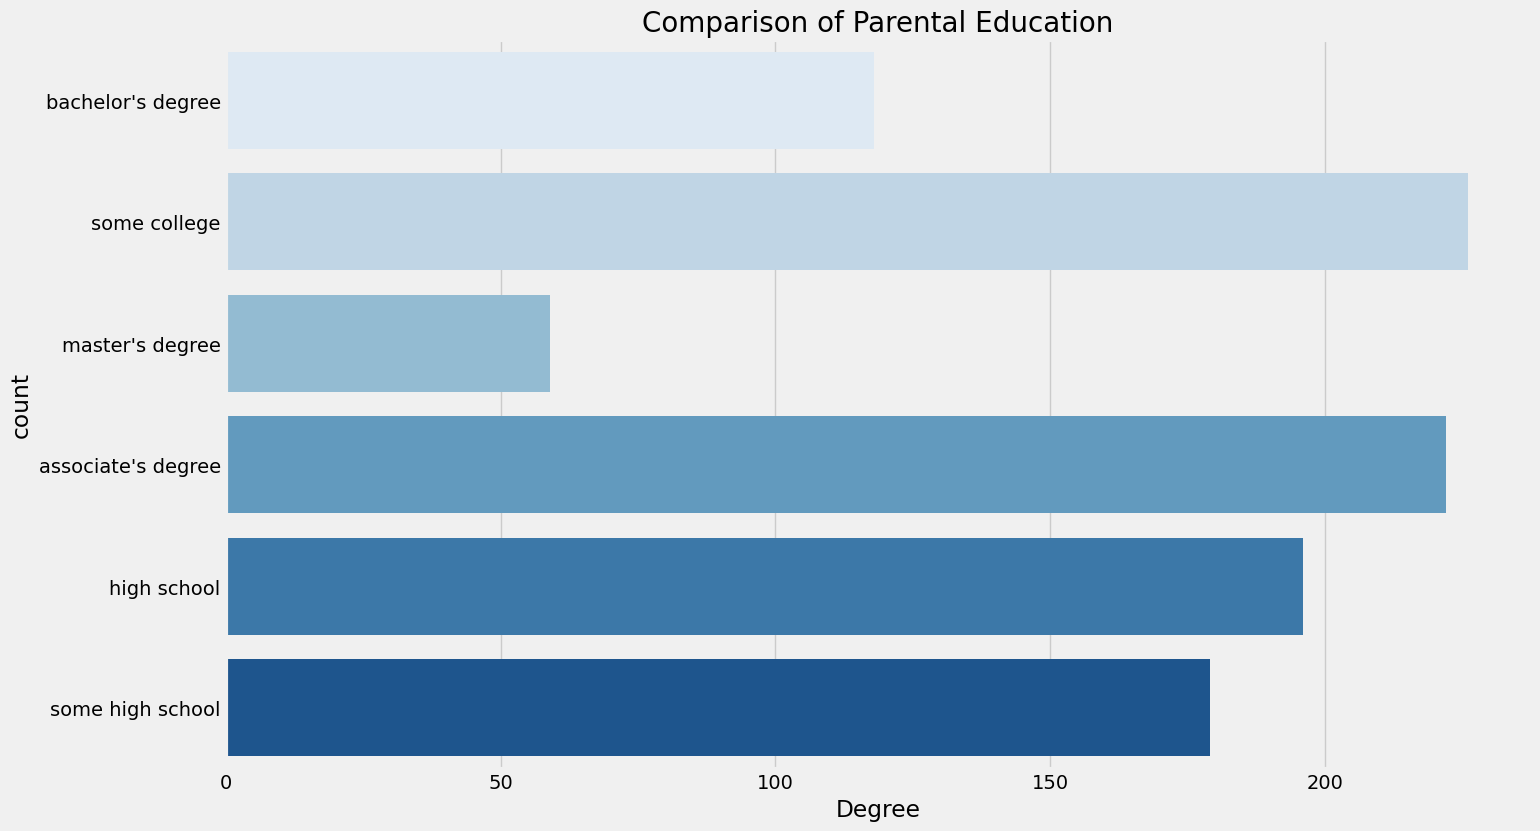

In [53]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

Insights on Parental Education Levels

- **Prevalent Education Background**: The data indicates that the largest number of parents fall into the 'Some College' category. This suggests that a significant portion of the student's parents have attended some college education, but it may not necessarily indicate completion of 


BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ?)

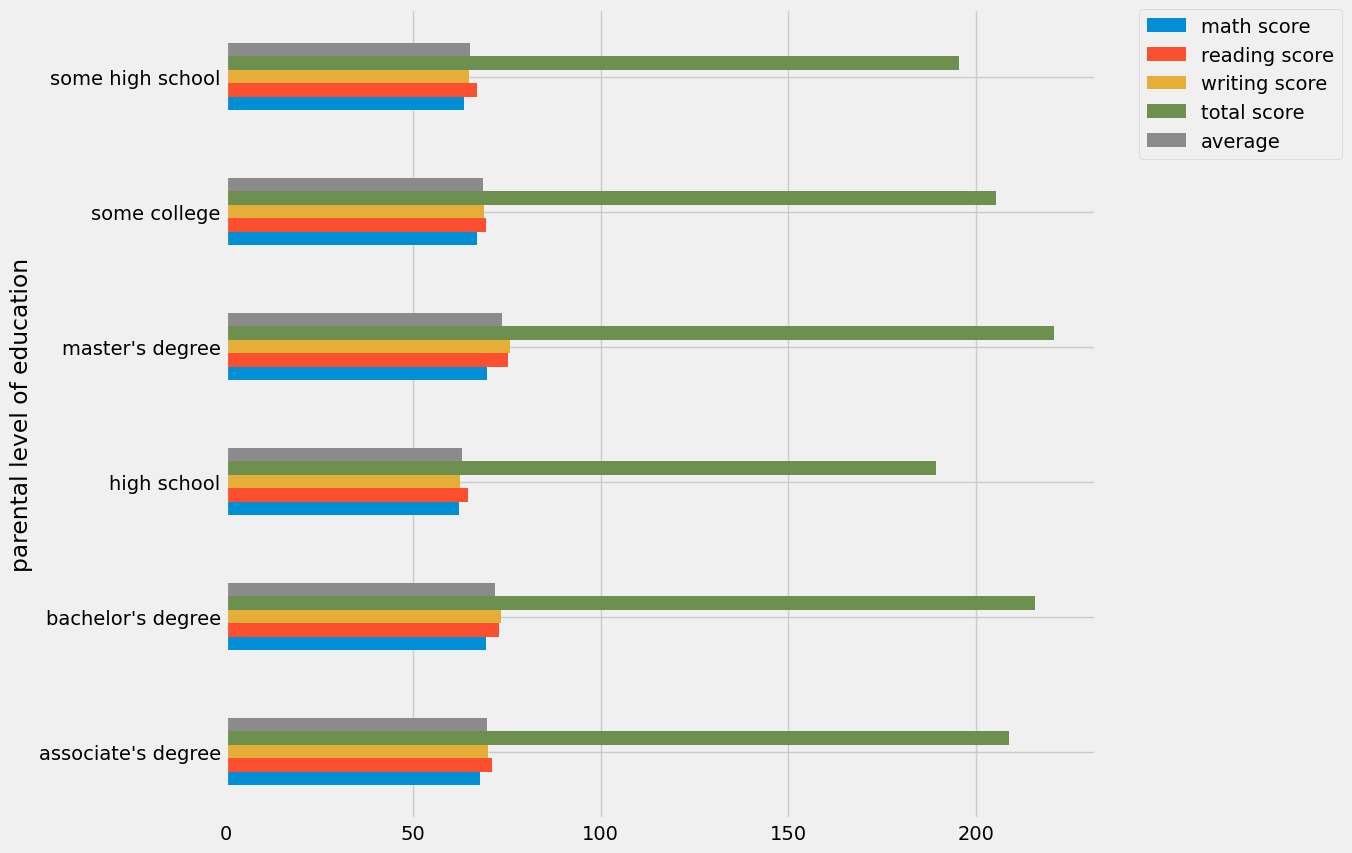

In [59]:

# Include 'parental level of education' along with numeric columns
columns_to_include = df.select_dtypes(include=['number']).columns.tolist() + ['parental level of education']

# Create a new DataFrame with the required columns
df_selected = df[columns_to_include]

# Group by 'parental level of education' and calculate the mean
df_grouped = df_selected.groupby('parental level of education').agg('mean')

# Plotting
df_grouped.plot(kind='barh', figsize=(10, 10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


Insights on the Impact of Parental Education on Student Scores

- **Higher Scores with Higher Parental Education**: Students whose parents possess a Master's or Bachelor's degree tend to have higher scores compared to their peers with parents having lower educational qualifications. This trend suggests a positive correlation between the level of parental education and student academic performance.


4.4.4 LUNCH COLUMN
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?

UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

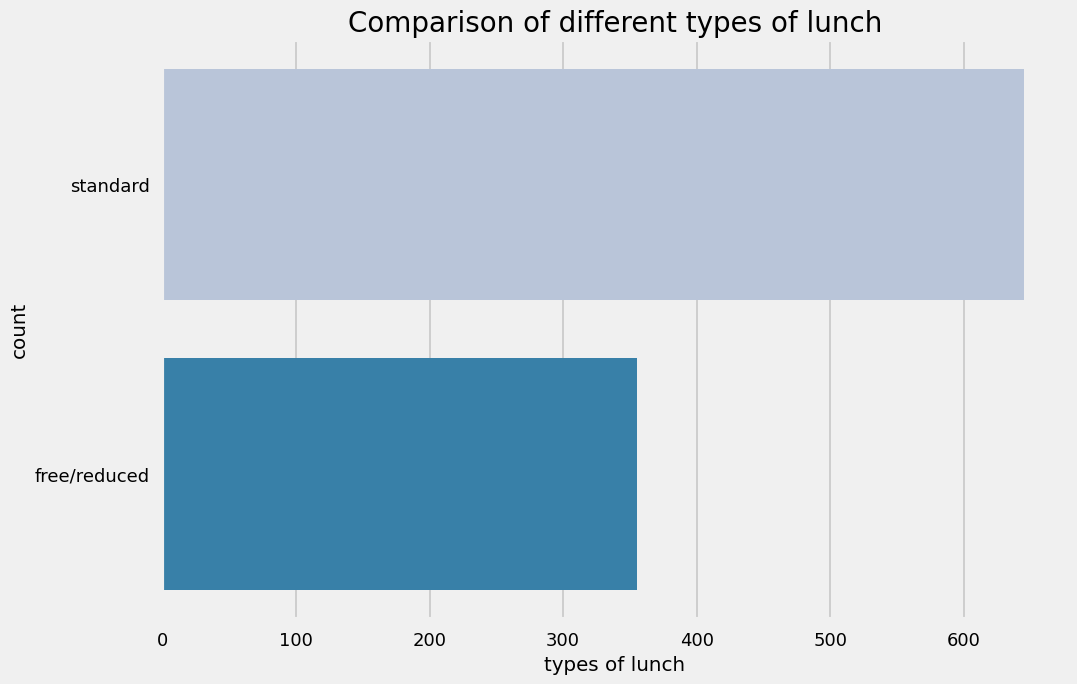

In [60]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

Insights on Lunch Provision for Students

- **Prevalence of Standard Lunch**: The analysis reveals that the number of students receiving standard lunch exceeds those receiving free/reduced lunch. This indicates a higher proportion of students are being served standard lunch in the educational setting.


BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )

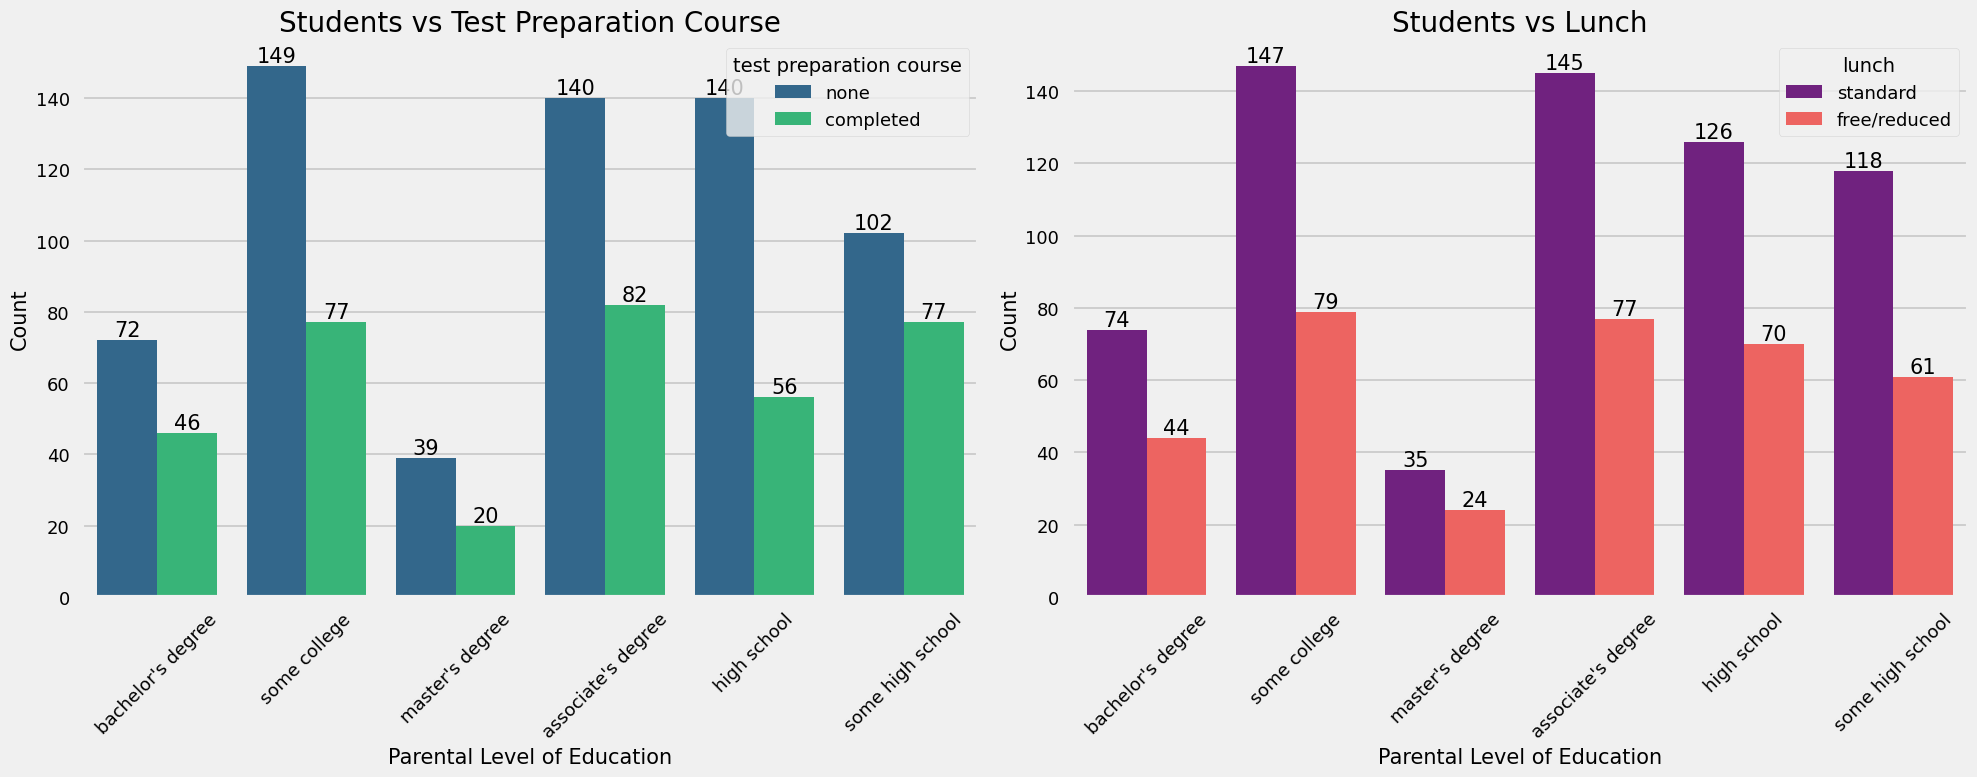

In [62]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))

# Plot 1: Students vs Test Preparation Course
sns.countplot(x='parental level of education', data=df, palette='viridis', hue='test preparation course', saturation=0.95, ax=ax[0])
ax[0].set_title('Students vs Test Preparation Course', color='black', size=20)
ax[0].tick_params(axis='x', rotation=45)
ax[0].set_xlabel('Parental Level of Education', fontsize=15)
ax[0].set_ylabel('Count', fontsize=15)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

# Plot 2: Students vs Lunch
sns.countplot(x='parental level of education', data=df, palette='magma', hue='lunch', saturation=0.95, ax=ax[1])
ax[1].set_title('Students vs Lunch', color='black', size=20)
ax[1].tick_params(axis='x', rotation=45)
ax[1].set_xlabel('Parental Level of Education', fontsize=15)
ax[1].set_ylabel('Count', fontsize=15)
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=15)

# Adjust layout for better spacing and display
plt.tight_layout()
plt.show()

Insights on the Impact of Lunch Type on Academic Performance

- **Performance Advantage with Standard Lunch**: Data analysis indicates that students receiving standard lunch generally outperform those who are provided with free or reduced lunch. This suggests a correlation between the type of lunch and academic achievement, where access to standard lunch appears to be a contributing factor to better academic performance.


4.4.5 TEST PREPARATION COURSE COLUMN
- Which type of lunch is most common amoung students ?
- Is Test prepration course has any impact on student's performance ?

BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

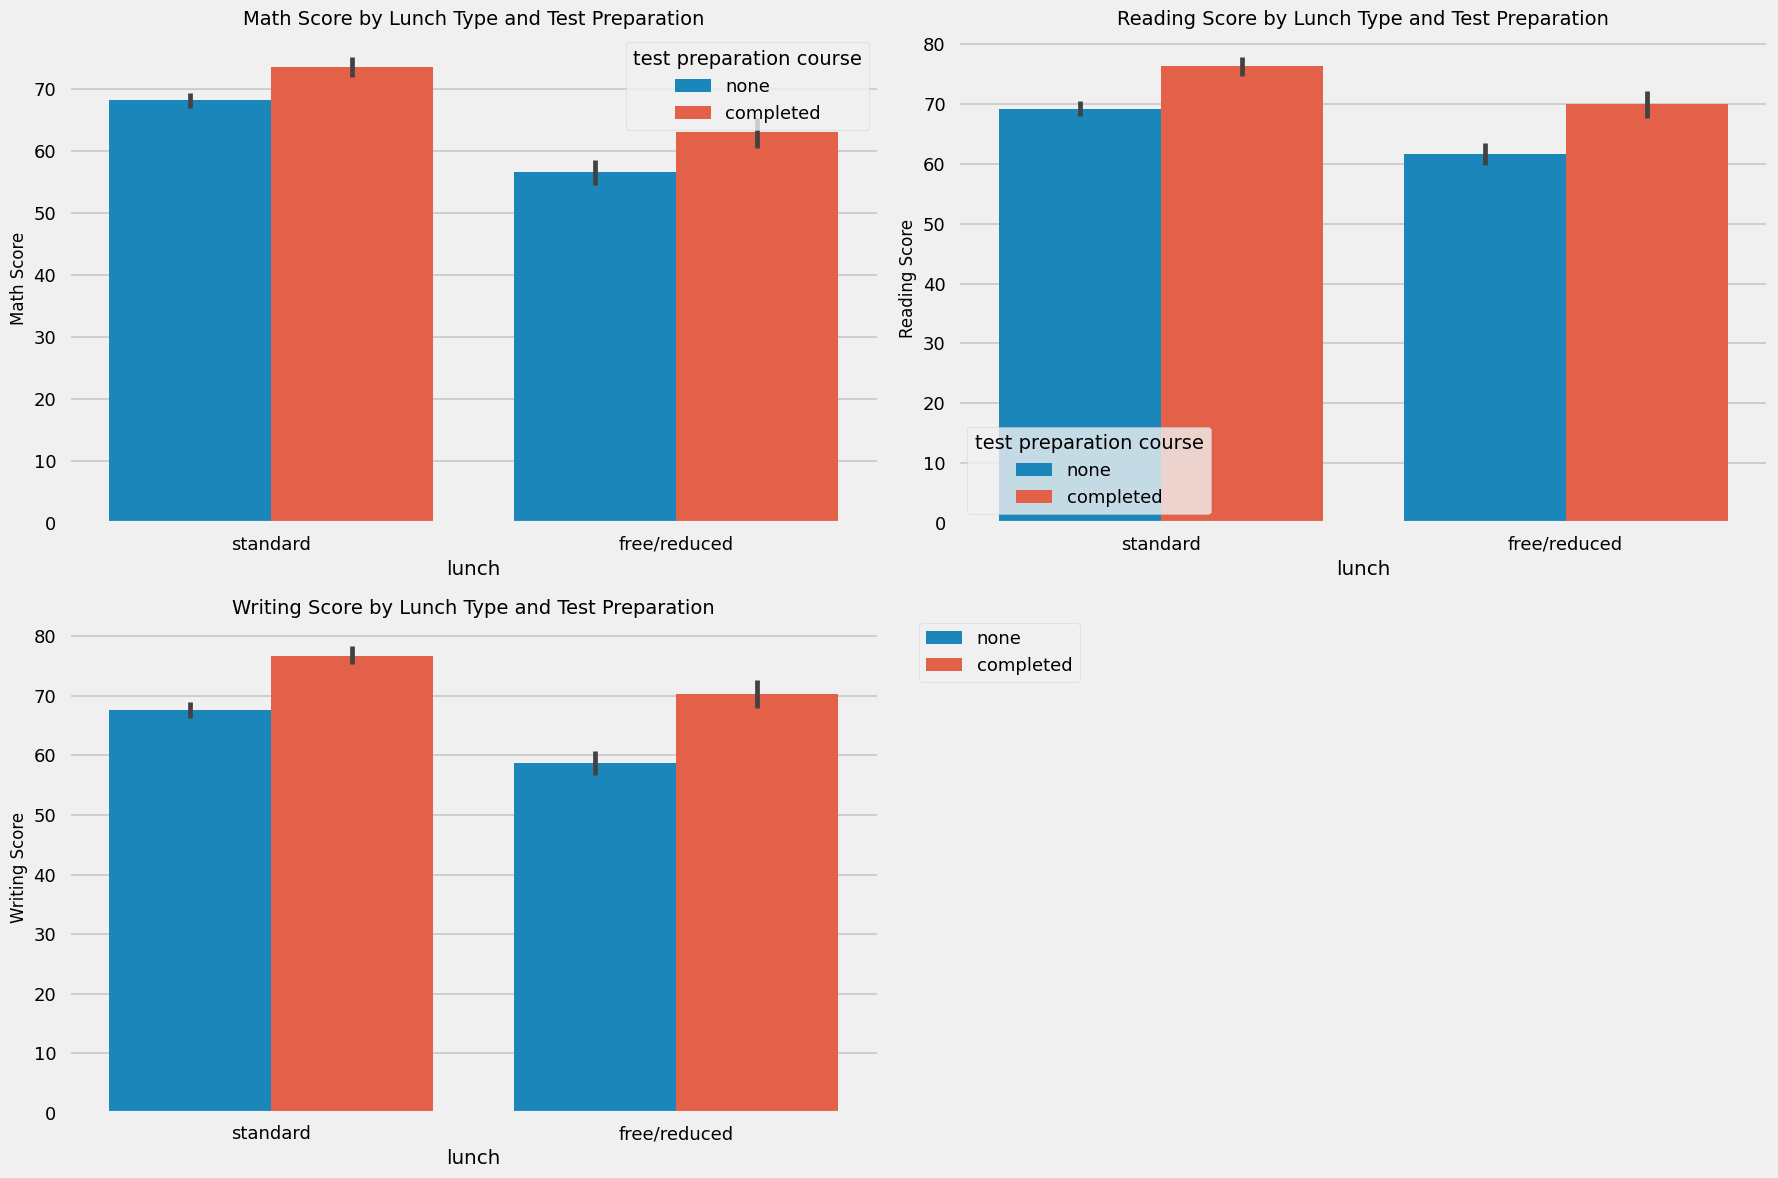

In [64]:

plt.figure(figsize=(18, 12))

# Math Score Plot
plt.subplot(2, 2, 1)
sns.barplot(x='lunch', y='math score', hue='test preparation course', data=df)
plt.title('Math Score by Lunch Type and Test Preparation', fontsize=14)
plt.ylabel('Math Score', fontsize=12)

# Reading Score Plot
plt.subplot(2, 2, 2)
sns.barplot(x='lunch', y='reading score', hue='test preparation course', data=df)
plt.title('Reading Score by Lunch Type and Test Preparation', fontsize=14)
plt.ylabel('Reading Score', fontsize=12)

# Writing Score Plot
plt.subplot(2, 2, 3)
sns.barplot(x='lunch', y='writing score', hue='test preparation course', data=df)
plt.title('Writing Score by Lunch Type and Test Preparation', fontsize=14)
plt.ylabel('Writing Score', fontsize=12)

# Adjust layout and add a legend
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


Insights on the Effectiveness of Test Preparation Courses

- **Enhanced Performance with Course Completion**: The analysis reveals that students who have completed a Test Preparation Course consistently score higher in all three categories (Math, Reading, and Writing) compared to those who haven't taken the course. This finding underscores the positive impact of such courses on academic performance across multiple subjects.


4.4.6 CHECKING OUTLIERS

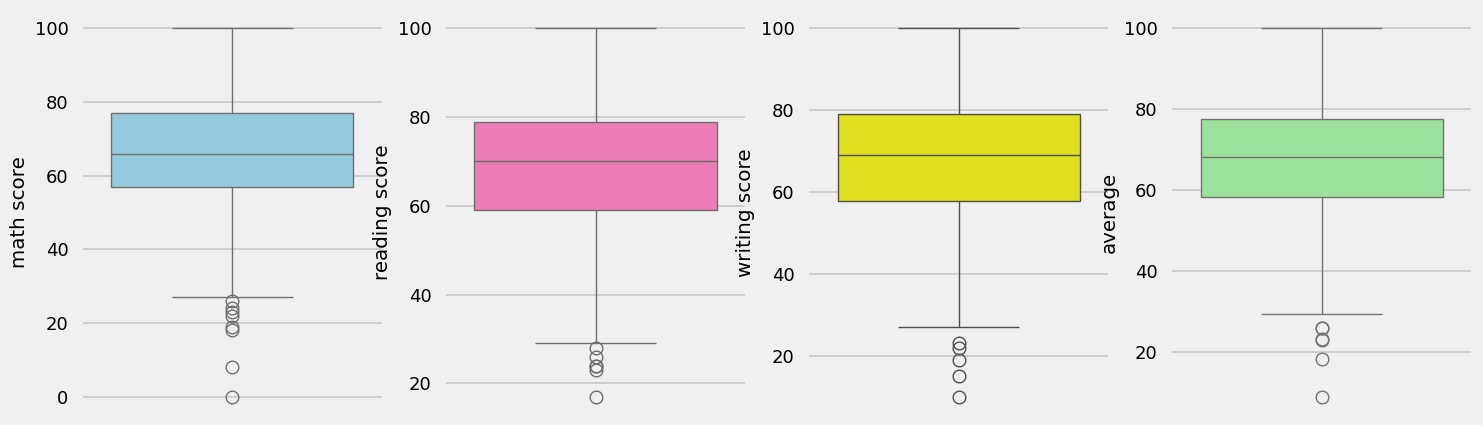

In [65]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

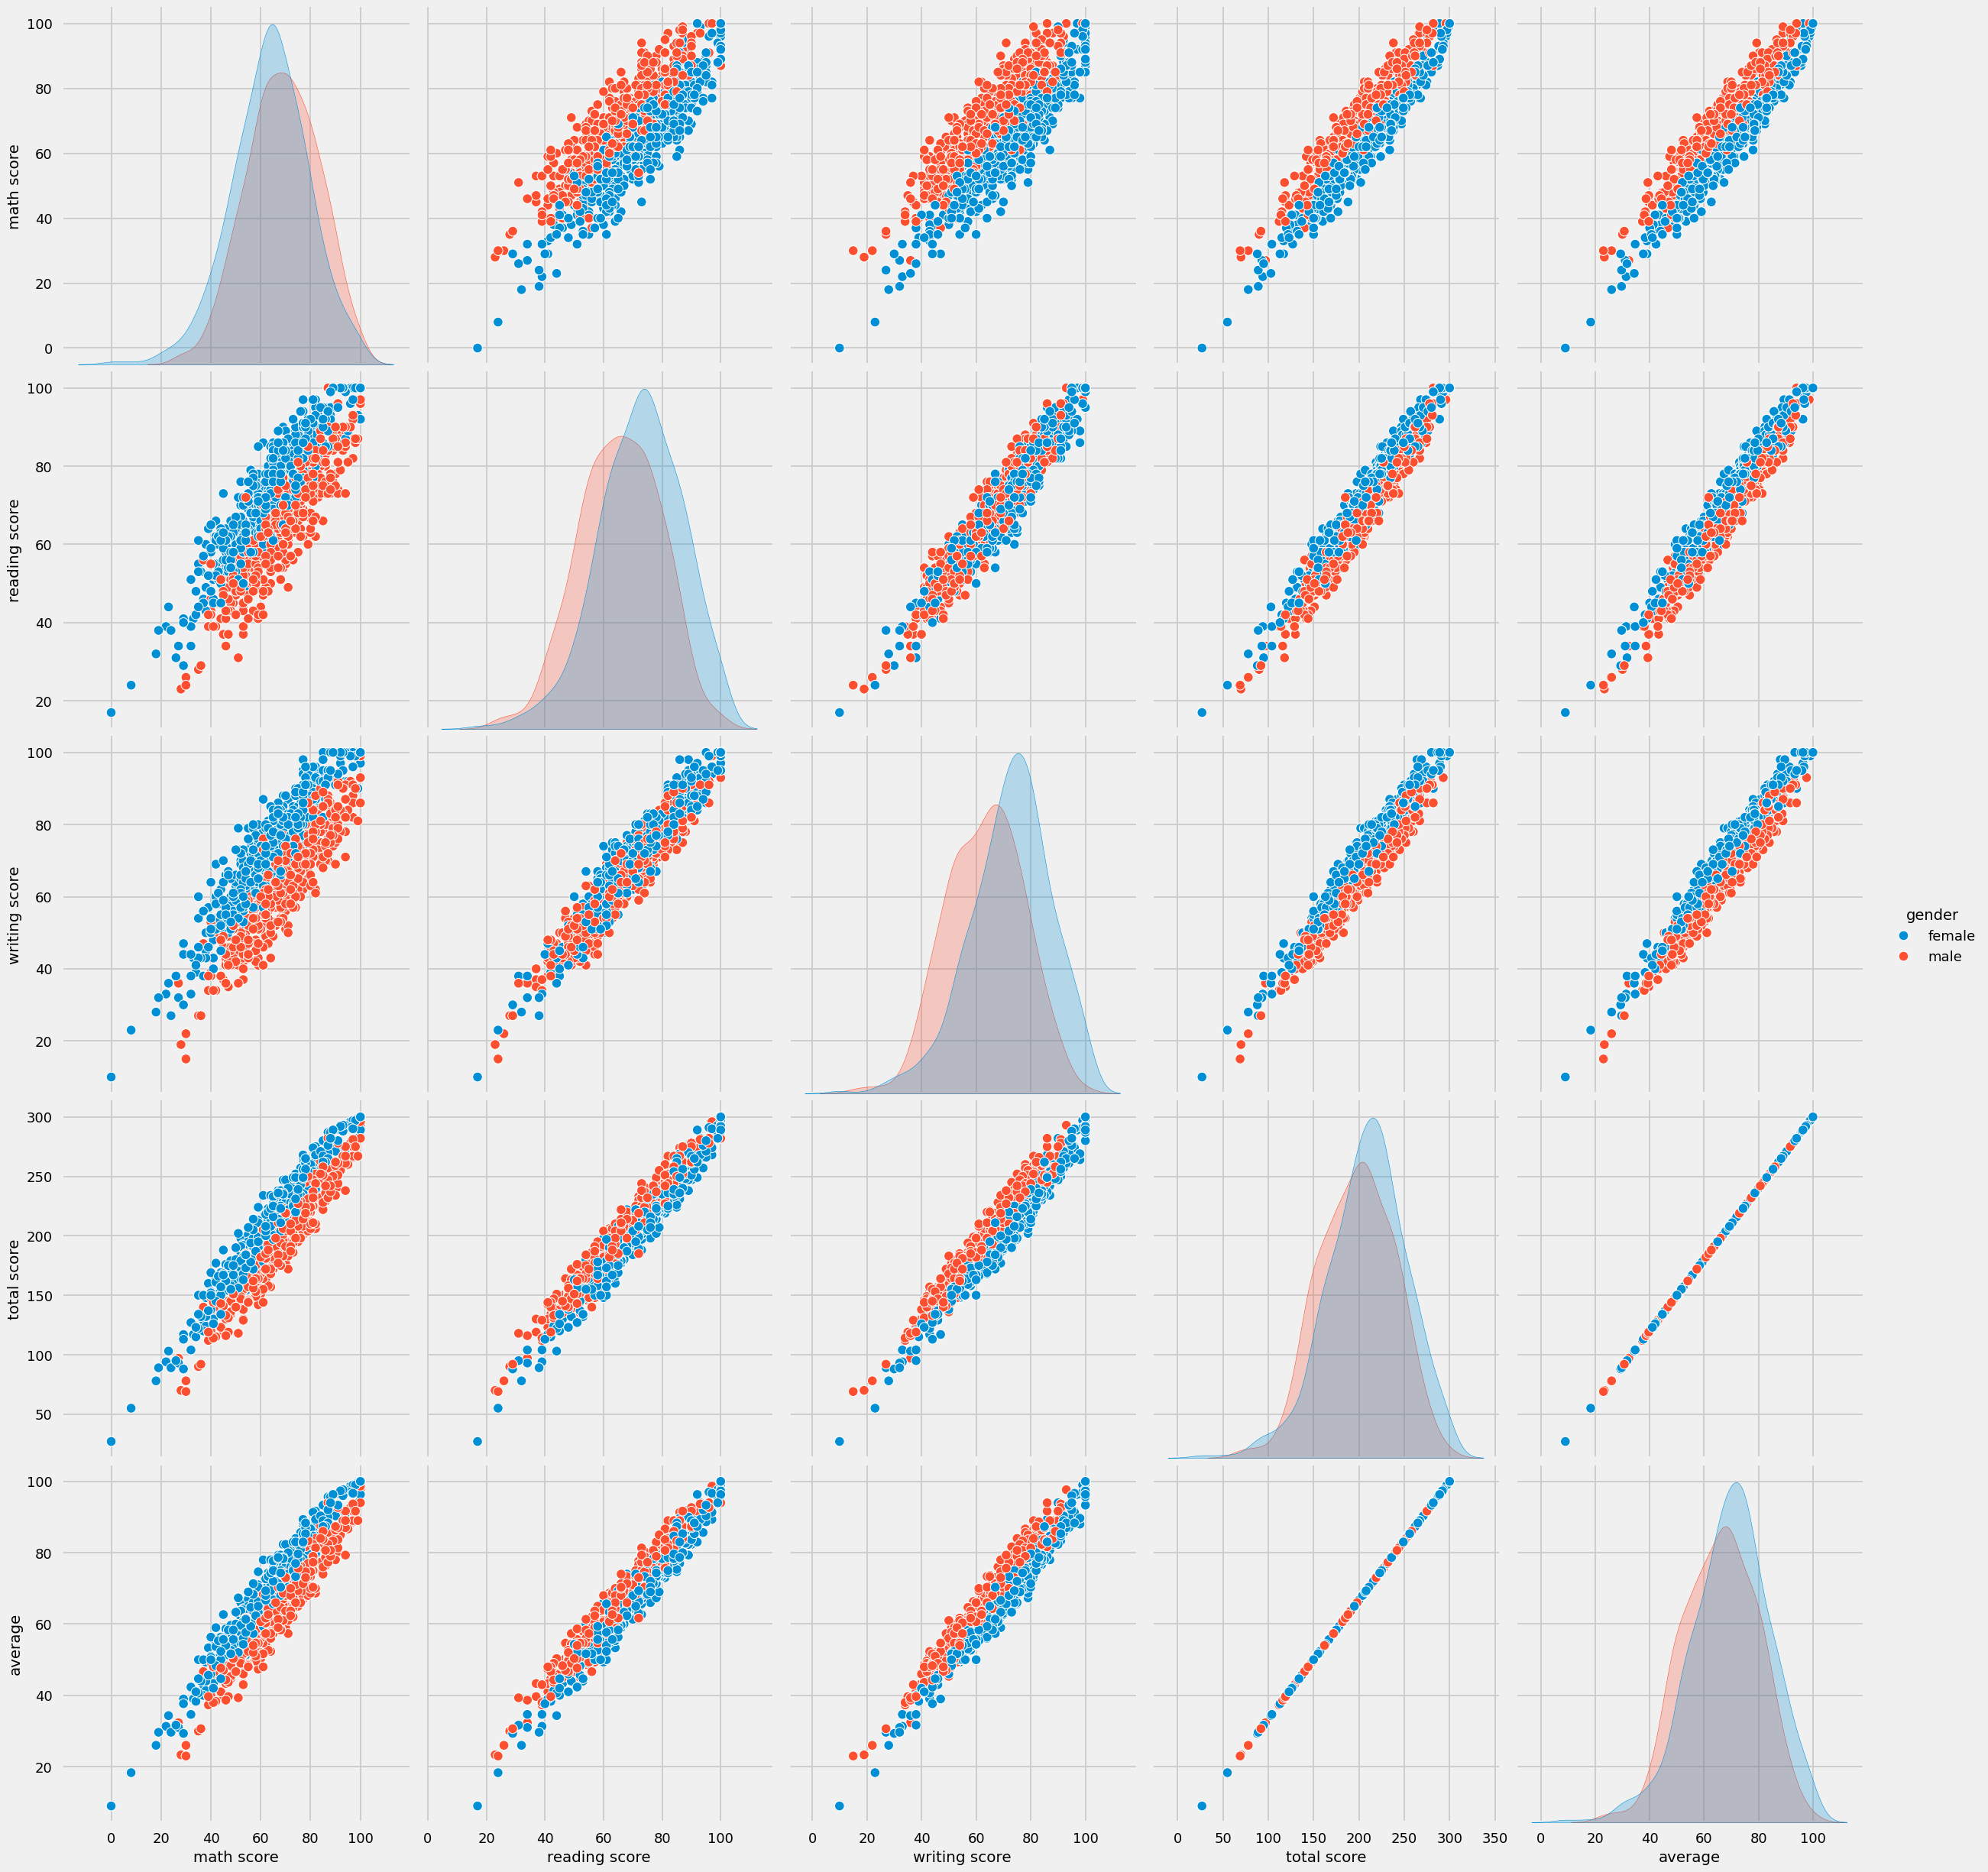

In [67]:
sns.pairplot(df,hue = 'gender',size=5)
plt.show()

Insights on the Linear Relationship Between Scores

- **Linear Correlation**: The observed plot suggests a linear relationship between scores in different subjects. As one score increases, the others tend to increase proportionally. This linear correlation indicates that students who perform well in one subject are likely to perform well in others as well, and vice versa.


5. Conclusions


- **Impact of Factors**: Student performance is notably related to factors such as the type of lunch, race/ethnicity, and parental level of education. These variables appear to influence academic outcomes.

- **Gender Performance**: Female students not only lead in terms of pass percentage but also emerge as the top-scorers, indicating their strong academic performance.

- **Test Preparation Course**: While student performance is not significantly related to the test preparation course, it is evident that completing such courses is beneficial, as it contributes to better academic outcomes.
